Student Name: Chi Nguyen
Machine Learning for Public Policy
HW2 - Applying a machine learning pipeline to the credit dataset
Pipeline codes are in the file clean.py

In [1]:
import clean

In [2]:
PERSON_ID = 'PersonID'
DELINQUENT = 'SeriousDlqin2yrs'
REV_UTIL = 'RevolvingUtilizationOfUnsecuredLines'
PAST_DUE_LESS_THAN_SIXTY = 'NumberOfTime30-59DaysPastDueNotWorse'
AGE = 'age'
ZIPCODE = 'zipcode'
DEBT_RATIO = 'DebtRatio'
INCOME = 'MonthlyIncome'
OPEN_CREDIT = 'NumberOfOpenCreditLinesAndLoans'
PAST_DUE_NINETY = 'NumberOfTimes90DaysLate'
PAST_DUE_LESS_THAN_NINETY = 'NumberOfTime60-89DaysPastDueNotWorse'
REAL_ESTATE_LINES = 'NumberRealEstateLoansOrLines'
DEPENDENTS = 'NumberOfDependents'

In [3]:
AGE_BINS = [0, 21, 36, 50, 65, 110]
AGE_LABELS = ['juvenile', 'young_adult', 'adult', 'middle_aged', 'senior']
INCOME_LABELS = ['low', 'medium', 'high']
REV_UTIL_LABELS = ['low', 'medium', 'high', 'very high']
DEBT_LABELS = ['low', 'medium', 'high']
OPEN_CREDIT_LABELS = ['low', 'medium', 'high']
REAL_ESTATE_LABELS = ['low', 'high']

# Step 1 - Read data

In [4]:
credit = clean.import_csv("credit-data.csv")

# Step 2 - Explore data

In [5]:
clean.explore_data(credit)

Let's take a look at the first 10 lines of the dataframe!

   PersonID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0     98976                 0                              1.000000   55   
1     98991                 0                              0.547745   71   
2     99012                 0                              0.044280   51   
3     99023                 0                              0.914249   55   
4     99027                 0                              0.026599   45   
5     99033                 0                              0.142231   57   
6     99044                 0                              0.047601   48   
7     99048                 0                              0.022141   34   
8     99056                 0                              0.241805   30   
9     99058                 0                              0.036181   71   

   zipcode  NumberOfTime30-59DaysPastDueNotWorse   DebtRatio  MonthlyIncome  \
0    60601               

The credit dataset has 13 columns and 41016 observations. All the columns are either integers or floats. In terms of data distribution, there are a three columns that draw attention:

-  Revolving utilization: the data for this column has a very wide range. 75% of the people in the datasets have utilization rate below 70% and there's a subset of people with abnormally high utilization rate. This suggests the presence of outliers, and we will deal with them in Step 3.
-  Debt Ratio: 75% of the people in this dataset has debt ratio of 87% or below. Again, there's a subset of people with abnormally high debt ratio. We will keep all of these observations for analysis.
-  Monthly Income: Maximum monthly income is 1.8 Million. This is very high, but seems reasonable if the person of interest is a billionaire. We will keep these outliers for analysis.

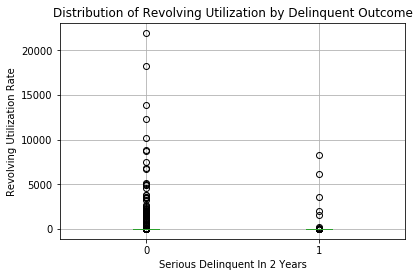

In [6]:
clean.create_boxplot(credit, 
                     REV_UTIL, 
                     DELINQUENT,
                     "Serious Delinquent In 2 Years",
                     "Revolving Utilization Rate",
                     "Distribution of Revolving Utilization by Delinquent Outcome")

The group who did not default has a wider range in revolving utilization rate than the group who defaulted. In fact, most of the extreme outliers with revolving utilization rate above 5000 all belong to the not-default group.

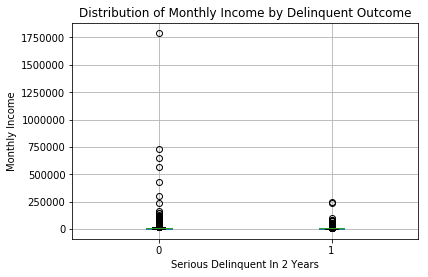

In [7]:
clean.create_boxplot(credit, 
                     INCOME, 
                     DELINQUENT,
                     "Serious Delinquent In 2 Years",
                     "Monthly Income",
                     "Distribution of Monthly Income by Delinquent Outcome")

The group who did not default has a wider range of monthly income than the group who defaulted. Most of the extreme outliers with really high monthly income comparing to the average of the sample belong to the group who did not default.

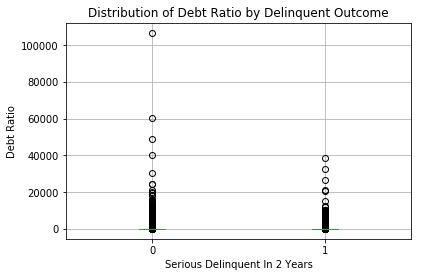

In [8]:
clean.create_boxplot(credit, 
                     DEBT_RATIO, 
                     DELINQUENT,
                     "Serious Delinquent In 2 Years",
                     "Debt Ratio",
                     "Distribution of Debt Ratio by Delinquent Outcome")

Similarly, the debt ratio in the group did not default is wider than the group who defaulted.

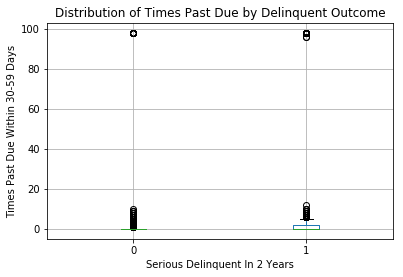

In [9]:
clean.create_boxplot(credit, 
                     PAST_DUE_LESS_THAN_SIXTY, 
                     DELINQUENT,
                     "Serious Delinquent In 2 Years",
                     "Times Past Due Within 30-59 Days",
                     "Distribution of Times Past Due by Delinquent Outcome")

The distribution of times past due within 30-59 days for the two groups default and not-default is strikingly different. The group who defaulted tends to have higher number of times credit payment was past due within 30-59 days than the group who did not default. This result seems reasonable since we would expect default group to deliver payment later or fails to deliver payment more often.

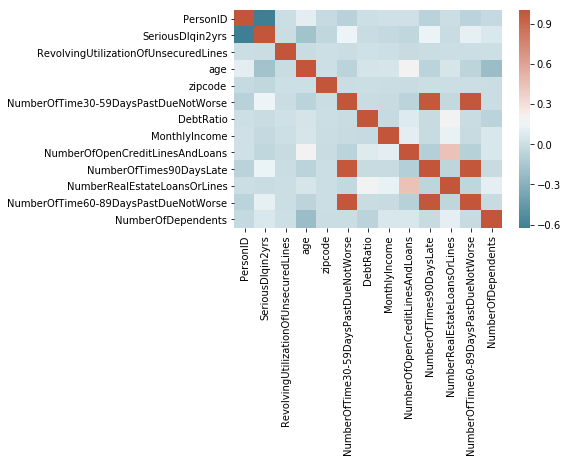

In [10]:
clean.create_corr_heatmap(credit)

This is the correlation heatmap for all 

In [11]:
outlier_revutil = clean.find_outliers(credit, REV_UTIL)

Outliers' shape:
(61, 13)


In [12]:
outlier_debt_ratio = clean.find_outliers(credit, DEBT_RATIO)

Outliers' shape:
(601, 13)


In [13]:
outlier_income = clean.find_outliers(credit, INCOME)

Outliers' shape:
(93, 13)


# Step 3 - Preprocess

In [14]:
clean.pre_process(credit, REV_UTIL)

Brief overview of the number of missingobservations for each column:

MonthlyIncome                           7974
NumberOfDependents                      1037
NumberOfTime60-89DaysPastDueNotWorse       0
NumberRealEstateLoansOrLines               0
NumberOfTimes90DaysLate                    0
NumberOfOpenCreditLinesAndLoans            0
DebtRatio                                  0
NumberOfTime30-59DaysPastDueNotWorse       0
zipcode                                    0
age                                        0
RevolvingUtilizationOfUnsecuredLines       0
SeriousDlqin2yrs                           0
PersonID                                   0
dtype: int64



List of columns that contain missing data:

['MonthlyIncome', 'NumberOfDependents']


Brief overview of the data distribution after pre-processing:

            PersonID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
count   41016.000000      41016.000000                          41016.000000   
mean   115800.154598

# Step 4 - Generate features/predictors

In [15]:
clean.convert_to_categorical_using_cut(credit, AGE, 'age_group', AGE_BINS, AGE_LABELS)

In [16]:
clean.convert_to_categorical_using_qcut(credit, INCOME, 'income_group', 3, INCOME_LABELS)

In [17]:
clean.convert_to_categorical_using_qcut(credit, REV_UTIL, 'rev_util_group', 4, REV_UTIL_LABELS)

In [18]:
TIMES_PAST_DUE_BINS = [0, credit[PAST_DUE_LESS_THAN_SIXTY].mean(), credit[PAST_DUE_LESS_THAN_SIXTY].max()]
TIMES_PAST_DUE_LABELS = ['normal', 'high']
clean.convert_to_categorical_using_cut(credit, 
                                       PAST_DUE_LESS_THAN_SIXTY, 
                                       'times_past_due_group', 
                                       TIMES_PAST_DUE_BINS, 
                                       TIMES_PAST_DUE_LABELS)

In [19]:
clean.convert_to_categorical_using_qcut(credit, DEBT_RATIO, 'debt_group', 3, DEBT_LABELS)

In [20]:
clean.convert_to_categorical_using_qcut(credit, OPEN_CREDIT, 'open_credit_group', 3, OPEN_CREDIT_LABELS)

In [21]:
clean.convert_to_categorical_using_qcut(credit, REAL_ESTATE_LINES, 'real_estate_group', 2, REAL_ESTATE_LABELS)

In [22]:
cols_to_transform = ['age_group', 
                     'income_group', 
                     'rev_util_group', 
                     'times_past_due_group',
                     'debt_group',
                     'open_credit_group',
                     'real_estate_group']

In [23]:
credit = clean.convert_to_binary(credit, cols_to_transform)

In [24]:
credit.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,...,times_past_due_group_normal,times_past_due_group_high,debt_group_low,debt_group_medium,debt_group_high,open_credit_group_low,open_credit_group_medium,open_credit_group_high,real_estate_group_low,real_estate_group_high
0,98976,0,1.000000,55,60601,0,505.000000,0.0,2,0,...,1,0,0,0,1,1,0,0,1,0
1,98991,0,0.547745,71,60601,0,0.459565,15666.0,7,0,...,1,0,0,1,0,0,1,0,0,1
2,99012,0,0.044280,51,60601,0,0.014520,4200.0,5,0,...,1,0,1,0,0,1,0,0,1,0
3,99023,0,0.914249,55,60601,4,0.794875,9052.0,12,0,...,0,1,0,0,1,0,0,1,0,1
4,99027,0,0.026599,45,60601,0,0.049966,10406.0,4,0,...,1,0,1,0,0,1,0,0,1,0


In [25]:
credit.shape

(41016, 35)

# Step 5 - Build Classifier

In [26]:
selected_features = list(credit.columns[13:])
selected_features

['age_group_juvenile',
 'age_group_young_adult',
 'age_group_adult',
 'age_group_middle_aged',
 'age_group_senior',
 'income_group_low',
 'income_group_medium',
 'income_group_high',
 'rev_util_group_low',
 'rev_util_group_medium',
 'rev_util_group_high',
 'rev_util_group_very high',
 'times_past_due_group_normal',
 'times_past_due_group_high',
 'debt_group_low',
 'debt_group_medium',
 'debt_group_high',
 'open_credit_group_low',
 'open_credit_group_medium',
 'open_credit_group_high',
 'real_estate_group_low',
 'real_estate_group_high']

In [27]:
outcome_col = DELINQUENT

In [28]:
test_size = 0.2

In [29]:
random_state = 100

In [30]:
(x_train, x_test, y_train, y_test) = clean.build_datasets(selected_features, outcome_col, test_size, credit, random_state)

In [31]:
max_depth = 4

In [32]:
dec_tree = clean.build_tree(max_depth, x_train, y_train)

# Step 6 - Evaluate Classifier using accuracy

In [33]:
threshold = .2

Histogram to show predicted scores when performed on test data:


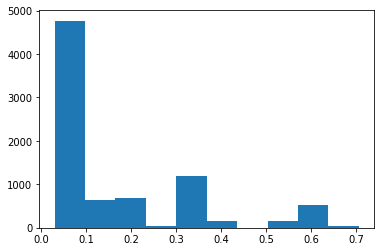


With the chosen threshold 0.2, chosen max_depth 4 and criterion gini the accuracy of the model is 0.772549975621648


In [34]:
test_acc = clean.evaluate_classifier(dec_tree, x_test, y_test, threshold)

In [35]:
clean.rank_features(dec_tree, x_train)

,Feature,Importance Weight
0,rev_util_group_very high,0.624319
1,times_past_due_group_normal,0.299719
2,rev_util_group_high,0.036451
3,income_group_high,0.014667
4,age_group_senior,0.012084
5,debt_group_high,0.007839
6,age_group_young_adult,0.004531
7,open_credit_group_high,0.000389
15,income_group_low,0.000000
20,real_estate_group_low,0.000000


# Holding threshold constant, varying max_depth and observe changes in accuracy

In [36]:
threshold = .3

In [37]:
depth_list = [1, 3, 5, 8, 10, 20, 30, 50]

In [38]:
clean.evaluate_accuracy_by_max_depth(threshold, depth_list, x_train, y_train, x_test, y_test)

Depth: 1 | Train acc: 0.79 | Test acc: 0.79
Depth: 3 | Train acc: 0.78 | Test acc: 0.78
Depth: 5 | Train acc: 0.82 | Test acc: 0.82
Depth: 8 | Train acc: 0.82 | Test acc: 0.81
Depth: 10 | Train acc: 0.82 | Test acc: 0.81
Depth: 20 | Train acc: 0.83 | Test acc: 0.81
Depth: 30 | Train acc: 0.83 | Test acc: 0.81
Depth: 50 | Train acc: 0.83 | Test acc: 0.81


# Holding max_depth constant, varying threshold and observe changes in accuracy

In [39]:
threshold_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [40]:
max_depth = 3

In [41]:
clean.evaluate_accuracy_by_threshold(max_depth, 
                                     threshold_list,
                                     x_train, 
                                     y_train, 
                                     x_test, 
                                     y_test)

Threshold: 0.1 | Train acc: 0.58 | Test acc: 0.58
Threshold: 0.2 | Train acc: 0.78 | Test acc: 0.78
Threshold: 0.3 | Train acc: 0.78 | Test acc: 0.78
Threshold: 0.4 | Train acc: 0.85 | Test acc: 0.85
Threshold: 0.5 | Train acc: 0.85 | Test acc: 0.85
Threshold: 0.6 | Train acc: 0.85 | Test acc: 0.85
Threshold: 0.7 | Train acc: 0.84 | Test acc: 0.84
Threshold: 0.8 | Train acc: 0.84 | Test acc: 0.84
Threshold: 0.9 | Train acc: 0.84 | Test acc: 0.84
